Data Pre-processing:

In [ ]:
#importing the libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q.1) Reading the above CSV file in google colab using the pandas’ library and converting it into data frames.

In [ ]:
#Loading the data:
df = pd.read_csv("/content/CarPrice_Assignment.csv")
#df1 = pd.read_csv("/content/Youtube_Influencer_Analysis.csv")

Reading the data:

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

Q.2) How many values are missing for each column and try dropping or replacing NULL values using appropriate pandas’ function.

In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There is no missing value or the null to replace...

Q.3) Drop the columns which are irrelevant features to feed into our model.

In [ ]:
df = df.drop_duplicates()
df.shape

(205, 26)

No duplicate column to drop...

But CarName is exactly similar to symboling as CarName columnn is just names while symboling is given numbers to the particular names of car.

S, droping CarName column.

In [ ]:
#Removing the extra Columns:
df.drop(['CarName'], axis = 1)

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Feature Engineering:

In [ ]:
#Freature Engineering:
df['CarVolume'] = (df['carlength']*df['carwidth']*df['carheight'])
#df['CarVolume'] = CarVolume
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,peakrpm,citympg,highwaympg,price,fueltype_cat,aspiration_cat,doornumber_cat,carbody_cat,drivewheel_cat,CarVolume
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,13495.0,1,0,1,0,2,528019.904
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,5000,21,27,16500.0,1,0,1,0,2,528019.904
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,5000,19,26,16500.0,1,0,1,2,2,587592.640
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,5500,24,30,13950.0,1,0,0,3,1,634816.956
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,5500,18,22,17450.0,1,0,0,3,0,636734.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,5400,23,28,16845.0,1,0,0,3,2,721961.760
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,5300,19,25,19045.0,1,1,0,3,2,720913.920
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,5500,18,23,21485.0,1,0,0,3,2,721961.760
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,4800,26,27,22470.0,0,1,0,3,2,721961.760


Q.4) Some columns are not statistical data but in the form of strings. It Is difficult for our model to learn when the data is in form of strings. Your task is to encode these strings using proper encoding techniques.

In [ ]:
#Encoding the labels:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['fueltype']))
df['fueltype_cat'] = df['fueltype'].apply(lambda x: le.transform([x])[0])
df[['fueltype','fueltype_cat']].value_counts()

fueltype  fueltype_cat
gas       1               185
diesel    0                20
dtype: int64

In [ ]:
#Encoding the labels:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['aspiration']))
df['aspiration_cat'] = df['aspiration'].apply(lambda x: le.transform([x])[0])
df[['aspiration','aspiration_cat']].value_counts()

aspiration  aspiration_cat
std         0                 168
turbo       1                  37
dtype: int64

In [ ]:
#Encoding the labels:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['doornumber']))
df['doornumber_cat'] = df['doornumber'].apply(lambda x: le.transform([x])[0])
df[['doornumber','doornumber_cat']].value_counts()

doornumber  doornumber_cat
four        0                 115
two         1                  90
dtype: int64

In [ ]:
#Encoding the Label:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['fuelsystem']))
df['fuelsystem_cat'] = df['fuelsystem'].apply(lambda x: le.transform([x])[0])
df[['fuelsystem','fuelsystem_cat']].value_counts()


fuelsystem  fuelsystem_cat
mpfi        5                 94
2bbl        1                 66
idi         3                 20
1bbl        0                 11
spdi        6                  9
4bbl        2                  3
mfi         4                  1
spfi        7                  1
dtype: int64

In [ ]:
#Encoding the labels:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['enginetype']))
df['enginetype_cat'] = df['enginetype'].apply(lambda x: le.transform([x])[0])
df[['enginetype','enginetype_cat']].value_counts()

enginetype  enginetype_cat
ohc         3                 148
ohcf        4                  15
ohcv        5                  13
dohc        0                  12
l           2                  12
rotor       6                   4
dohcv       1                   1
dtype: int64

In [ ]:
#Encoding the labels:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(df['cylindernumber']))
df['cylindernumber_cat'] = df['cylindernumber'].apply(lambda x: le.transform([x])[0])
df[['cylindernumber','cylindernumber_cat']].value_counts()

cylindernumber  cylindernumber_cat
four            2                     159
six             3                      24
five            1                      11
eight           0                       5
two             6                       4
three           4                       1
twelve          5                       1
dtype: int64

In [ ]:
df.describe()

,car_ID,symboling,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,citympg,highwaympg,price,fueltype_cat,aspiration_cat,doornumber_cat,carbody_cat,drivewheel_cat,CarVolume,fuelsystem_cat
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,1.326829,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,...,25.219512,30.751220,13276.710571,0.902439,0.180488,0.439024,2.614634,1.326829,618719.288873,3.253659
std,59.322565,1.245307,0.556171,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,...,6.542142,6.886443,7988.852332,0.297446,0.385535,0.497483,0.859081,0.556171,79463.195262,2.013204
min,1.000000,-2.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,...,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,452643.156000,0.000000
25%,52.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,...,19.000000,25.000000,7788.000000,1.000000,0.000000,0.000000,2.000000,1.000000,566490.600000,1.000000
50%,103.000000,1.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,...,24.000000,30.000000,10295.000000,1.000000,0.000000,0.000000,3.000000,1.000000,601385.700000,5.000000
75%,154.000000,2.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,...,30.000000,34.000000,16503.000000,1.000000,0.000000,1.000000,3.000000,2.000000,666250.200000,5.000000
max,205.000000,3.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,...,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,4.000000,2.000000,846007.659000,7.000000


Finding the correlation:

In [ ]:
#Correlation:
df.corr()

,car_ID,symboling,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,citympg,highwaympg,price,fueltype_cat,aspiration_cat,doornumber_cat,carbody_cat,drivewheel_cat,CarVolume,fuelsystem_cat
car_ID,1.000000,-0.151621,0.051406,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,...,0.015940,0.011255,-0.109093,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.187614,0.204898
symboling,-0.151621,1.000000,-0.041671,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,...,-0.035823,0.034606,-0.079978,0.194311,-0.059866,0.664073,-0.596135,-0.041671,-0.456263,0.091163
drivewheel,0.051406,-0.041671,1.000000,0.459745,0.485649,0.470751,-0.019719,0.575111,0.524307,0.481827,...,-0.449581,-0.452220,0.577992,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.391977,0.424686
wheelbase,0.129729,-0.531954,0.459745,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,...,-0.470414,-0.544082,0.577816,-0.308346,0.257611,-0.447357,0.401362,0.459745,0.913669,0.384601
carlength,0.170636,-0.357612,0.485649,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,...,-0.670909,-0.704662,0.682920,-0.212679,0.234539,-0.398568,0.334433,0.485649,0.950070,0.557810
carwidth,0.052387,-0.232919,0.470751,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,...,-0.642704,-0.677218,0.759325,-0.233880,0.300567,-0.207168,0.131710,0.470751,0.832217,0.521434
carheight,0.255960,-0.541038,-0.019719,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,...,-0.048640,-0.107358,0.119336,-0.284631,0.087311,-0.552208,0.568534,-0.019719,0.704074,0.017046
curbweight,0.071962,-0.227691,0.575111,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,...,-0.757414,-0.797465,0.835305,-0.217275,0.324902,-0.197379,0.128467,0.575111,0.819806,0.611642
enginesize,-0.033930,-0.105790,0.524307,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,...,-0.653658,-0.677470,0.874145,-0.069594,0.108217,-0.020742,-0.073352,0.524307,0.594351,0.514070
boreratio,0.260064,-0.130051,0.481827,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,...,-0.584532,-0.587012,0.553173,-0.054451,0.212614,-0.119258,0.010549,0.481827,0.538588,0.475599


Heatmap shows the correlation in coloured form.

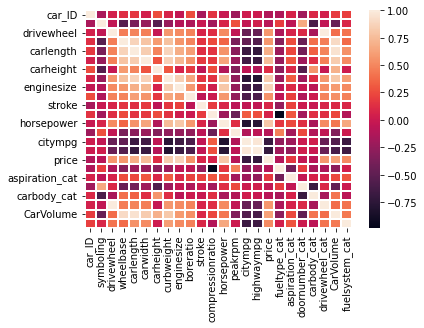

In [ ]:
sns.heatmap(data=df.corr(), lw=1)

Data Visulazation:

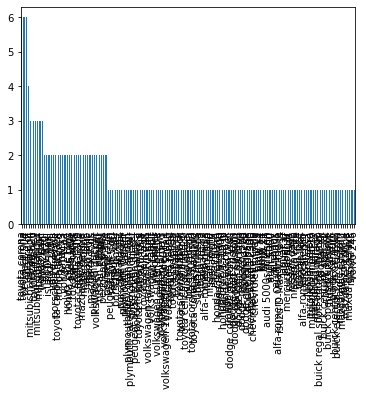

In [ ]:
df['CarName'].value_counts().plot.bar()

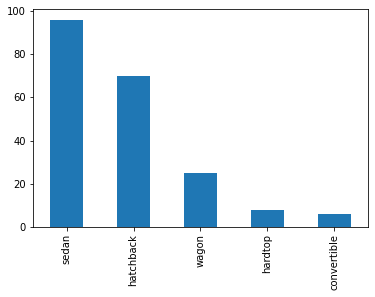

In [ ]:
df['carbody'].value_counts().plot.bar()

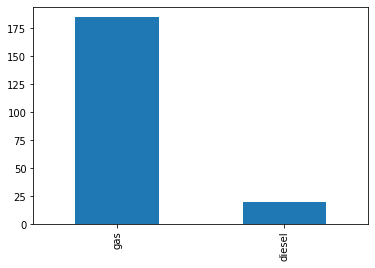

In [ ]:
df['fueltype'].value_counts().plot.bar()

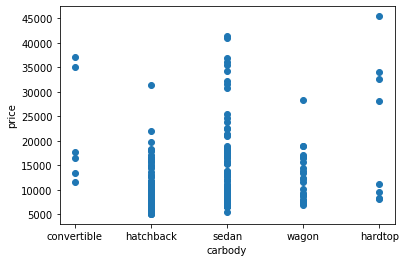

In [ ]:
plt.scatter(df.carbody, df.price)
plt.xlabel("carbody")
plt.ylabel("price")
plt.show()

Feature Engineering:

In [ ]:
df['avg_mpg']= (df['citympg']+df['highwaympg'])/2
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,highwaympg,price,fueltype_cat,aspiration_cat,doornumber_cat,carbody_cat,drivewheel_cat,CarVolume,fuelsystem_cat,avg_mpg
0,1,3,alfa-romero giulia,gas,std,two,convertible,2,front,88.6,...,27,13495.0,1,0,1,0,2,528019.904,5,24.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,2,front,88.6,...,27,16500.0,1,0,1,0,2,528019.904,5,24.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,2,front,94.5,...,26,16500.0,1,0,1,2,2,587592.640,5,22.5
3,4,2,audi 100 ls,gas,std,four,sedan,1,front,99.8,...,30,13950.0,1,0,0,3,1,634816.956,5,27.0
4,5,2,audi 100ls,gas,std,four,sedan,0,front,99.4,...,22,17450.0,1,0,0,3,0,636734.832,5,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,2,front,109.1,...,28,16845.0,1,0,0,3,2,721961.760,5,25.5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,2,front,109.1,...,25,19045.0,1,1,0,3,2,720913.920,5,22.0
202,203,-1,volvo 244dl,gas,std,four,sedan,2,front,109.1,...,23,21485.0,1,0,0,3,2,721961.760,5,20.5
203,204,-1,volvo 246,diesel,turbo,four,sedan,2,front,109.1,...,27,22470.0,0,1,0,3,2,721961.760,3,26.5


2 Variable scatter plot

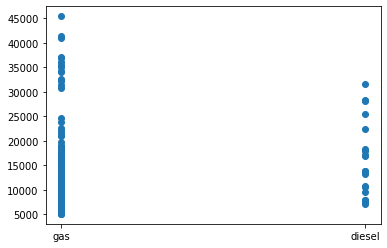

In [ ]:
plt.scatter(df.fueltype, df.price)
plt.xlabel = ("fueltype")
plt.ylabel = ("price")

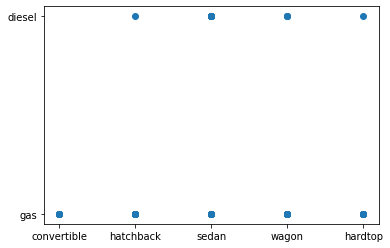

In [ ]:
plt.scatter(df.carbody, df.fueltype)
plt.xlabel = ("fueltype")
plt.ylabel = ("carbody")

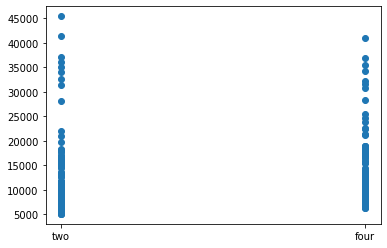

In [ ]:
plt.scatter(df.doornumber, df.price)
plt.xlabel = ("doornumber")
plt.ylabel = ("price")

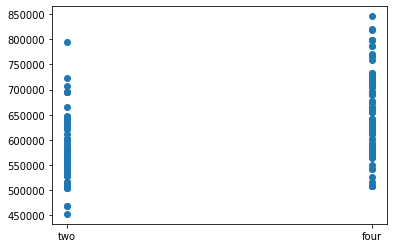

In [ ]:
plt.scatter(df.doornumber, df.CarVolume)
plt.xlabel = ("doornumber")
plt.ylabel = ("CarVolume")

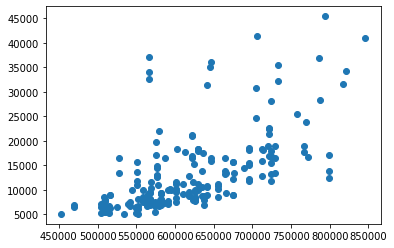

In [ ]:
plt.scatter(df.CarVolume, df.price)
plt.xlabel = ("CarVolume")
plt.ylabel = ("price")

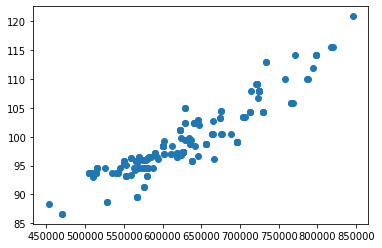

In [ ]:
plt.scatter(df.CarVolume, df.wheelbase)
plt.xlabel = ("CarVolume")
plt.ylabel = ("wheelbase")

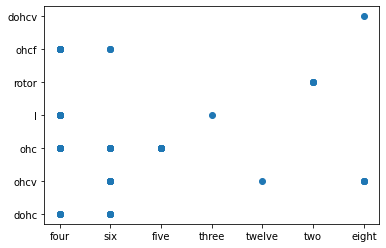

In [ ]:
plt.scatter(df.cylindernumber, df.enginetype)
plt.xlabel = ("cylindernumber")
plt.ylabel = ("enginetype")

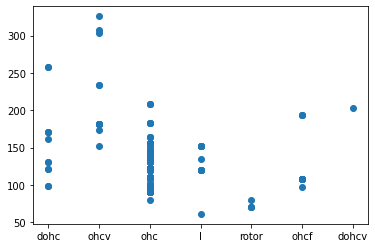

In [ ]:
plt.scatter(df.enginetype, df.enginesize)
plt.xlabel = ("enginetype")
plt.ylabel = ("enginesize")

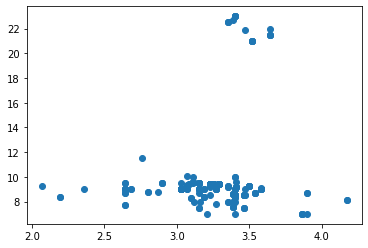

In [ ]:
plt.scatter(df.stroke, df.compressionratio)
plt.xlabel = ("stroke")
plt.ylabel = ("compressionratio")

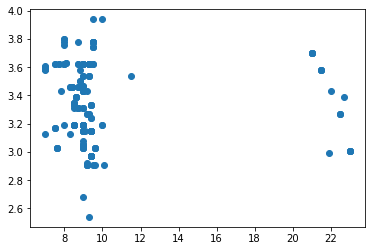

In [ ]:
plt.scatter(df.compressionratio, df.boreratio)
plt.xlabel = ("compressionratio")
plt.ylabel = ("boreratio")

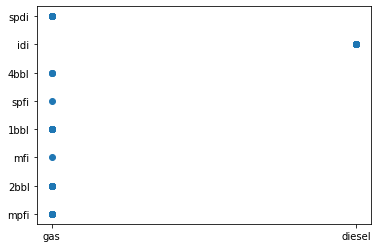

In [ ]:
plt.scatter(df.fueltype, df.fuelsystem)
plt.xlabel = ("fueltype")
plt.ylabel = ("fuelsystem")

So, the above graphs shows the relation between the given 2 variables in all the graphs.

Conclusion: Data Visulazation gives good idea about the relation and the categories of each feature.